# Figure 4 Comparative transcriptome analysis across species and development

#  

In [1]:
import numpy as np
import pandas as pd
import scanpy.api as sc

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=120, color_map='viridis')# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/anaconda3/lib/python3.6/site-packages/scanpy/api/__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


scanpy==1.4.6 anndata==0.7.1 umap==0.3.10 numpy==1.15.4 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.1 statsmodels==0.11.0rc1 python-igraph==0.7.1 louvain==0.6.1


In [2]:
sc.settings.set_figure_params(dpi=120, color_map='viridis')

... storing 'Garnett Prediction' as categorical


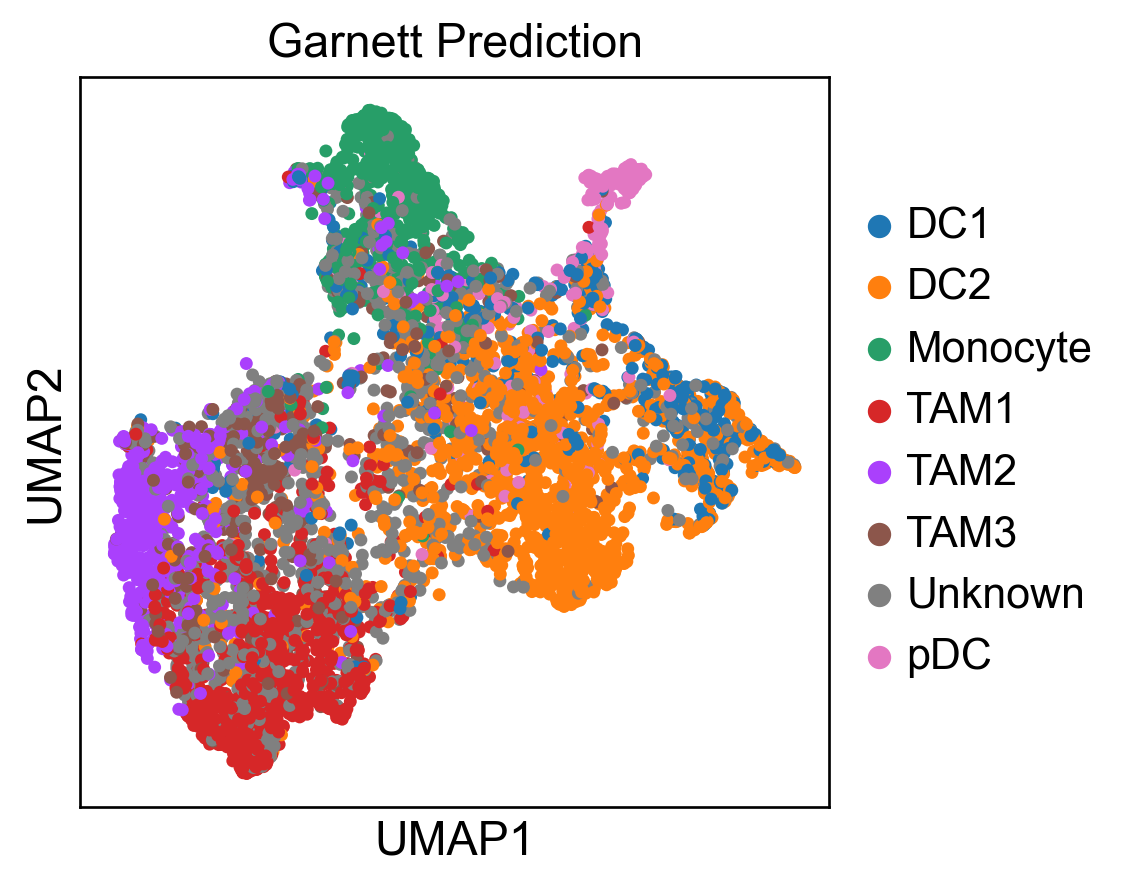

In [4]:
train = sc.read("./data/HCCmyewoF.h5ad")
trainmyedf = pd.read_csv('./data/cluster_ext_type.csv',index_col=0)
train.obs['Garnett Prediction'] = trainmyedf.cluster_ext_type
sc.pl.umap(train, color='Garnett Prediction', size = 60,
           palette=['#1f77b4','#ff7f0e','#279e68','#d62728','#aa40fc','#8c564b','#808080','#e377c2'])

... storing 'Garnett Prediction' as categorical


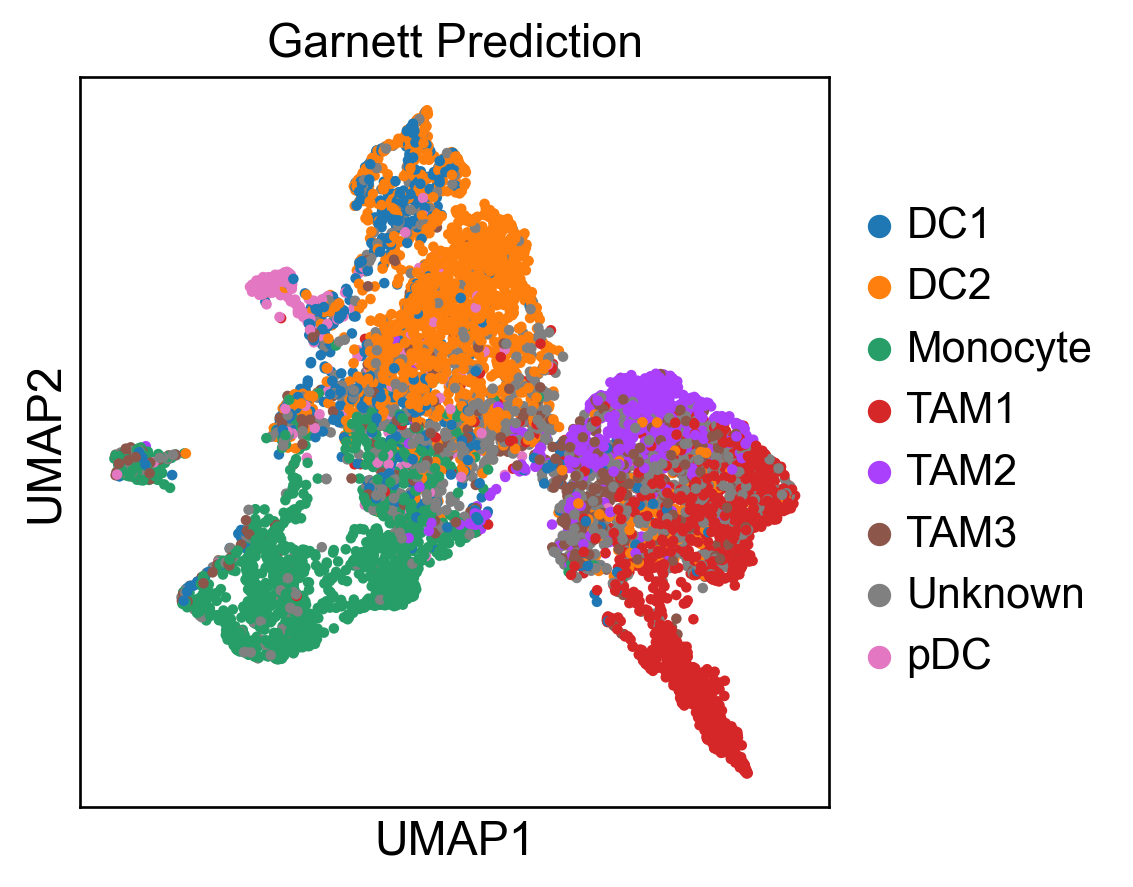

In [5]:
test = sc.read("./data/mye_wo_b.h5ad")
testmyedf = pd.read_csv('./data/test_cluster_ext_type.csv',index_col=0)
test.obs['Garnett Prediction'] = testmyedf.cluster_ext_type
sc.pl.umap(test, color='Garnett Prediction', size=40, 
           palette=['#1f77b4','#ff7f0e','#279e68','#d62728','#aa40fc','#8c564b','#808080','#e377c2'])

... storing 'Garnett Prediction' as categorical


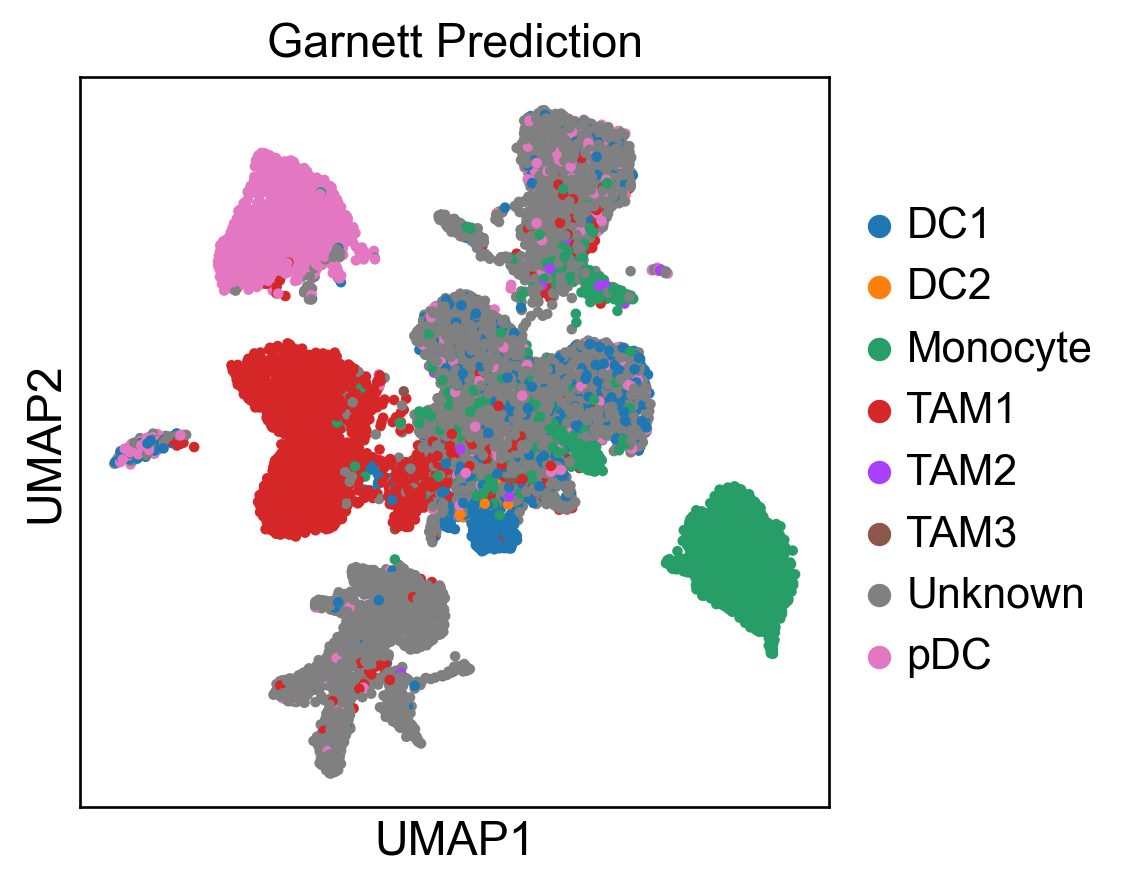

In [6]:
mouse = sc.read('./data/controlmouse.h5ad')
mousedf = pd.read_csv('./data/cluster_ext_type_mouselabelledbyhccmye.csv',index_col=0)
mouse.obs['Garnett Prediction'] = mousedf.cluster_ext_type
sc.pl.umap(mouse, color='Garnett Prediction', size=40,
           palette=['#1f77b4','#ff7f0e','#279e68','#d62728','#aa40fc','#8c564b','#808080','#e377c2'])

/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


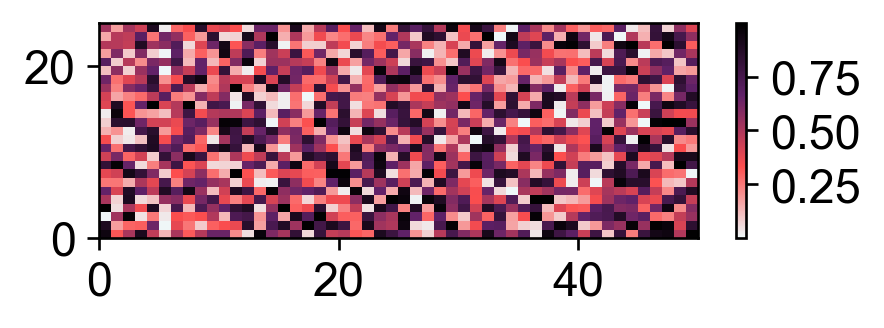

In [7]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

cmap = matplotlib.cm.ocean.reversed()

def make_cmap(colors, position=None, bit=False):
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap

fig = plt.figure()
ax = fig.add_subplot(311)
### Create a list of RGB tuples
colors = [(239, 248, 249), (252, 78, 78),(96, 33, 104),(0,0,0)]  # This example uses the 8-bit RGB
### Call the function make_cmap which returns your colormap
my_cmap = make_cmap(colors, bit=True)
### Use your colormap
plt.pcolor(np.random.rand(25,50), cmap=my_cmap)
plt.colorbar()

def sns_heatmap(df,title,subtitle):
    mat = pd.DataFrame()

    for i in range(df.shape[1]):
        if i==df.shape[1]-1:
            break
        for j in range(df.shape[0]):
            a = []
            for k in range(df.shape[0]):
                if j == k:
                    a.append(df.iloc[j,i]*df.iloc[k,i+1])
                else :
                    a.append(0)
            mat[j]=a

    mat.columns = df.index
    mat.index = df.index

    mat = mat.rename_axis(df.columns[1])
    mat = mat.rename_axis(df.columns[0], axis="columns")

    f, ax = plt.subplots()
    sns.heatmap(mat,vmax=1500, vmin=-1, cmap=my_cmap)#
    plt.title(title, fontsize=20)
    plt.suptitle(subtitle, fontsize=12)

    ax.xaxis.set_tick_params(labelsize=8)
    ax.yaxis.set_tick_params(labelsize=8)



## Test on HCC

Previous size: [4.0, 4.0]
Current size: [7, 6]


,cluster_ext_type,CellType
AAGTCTGTCATCTGCC-1,DC2,DC2
ACTTTCACAGTCTTCC-1,DC2,DC1
ACTTTCAGTCCCTACT-1,TAM1,TAM1
CAACTAGCACCCTATC-1,DC2,DC2
CCTTCCCTCGCCTGTT-1,Monocyte,Monocyte


(6898, 2)


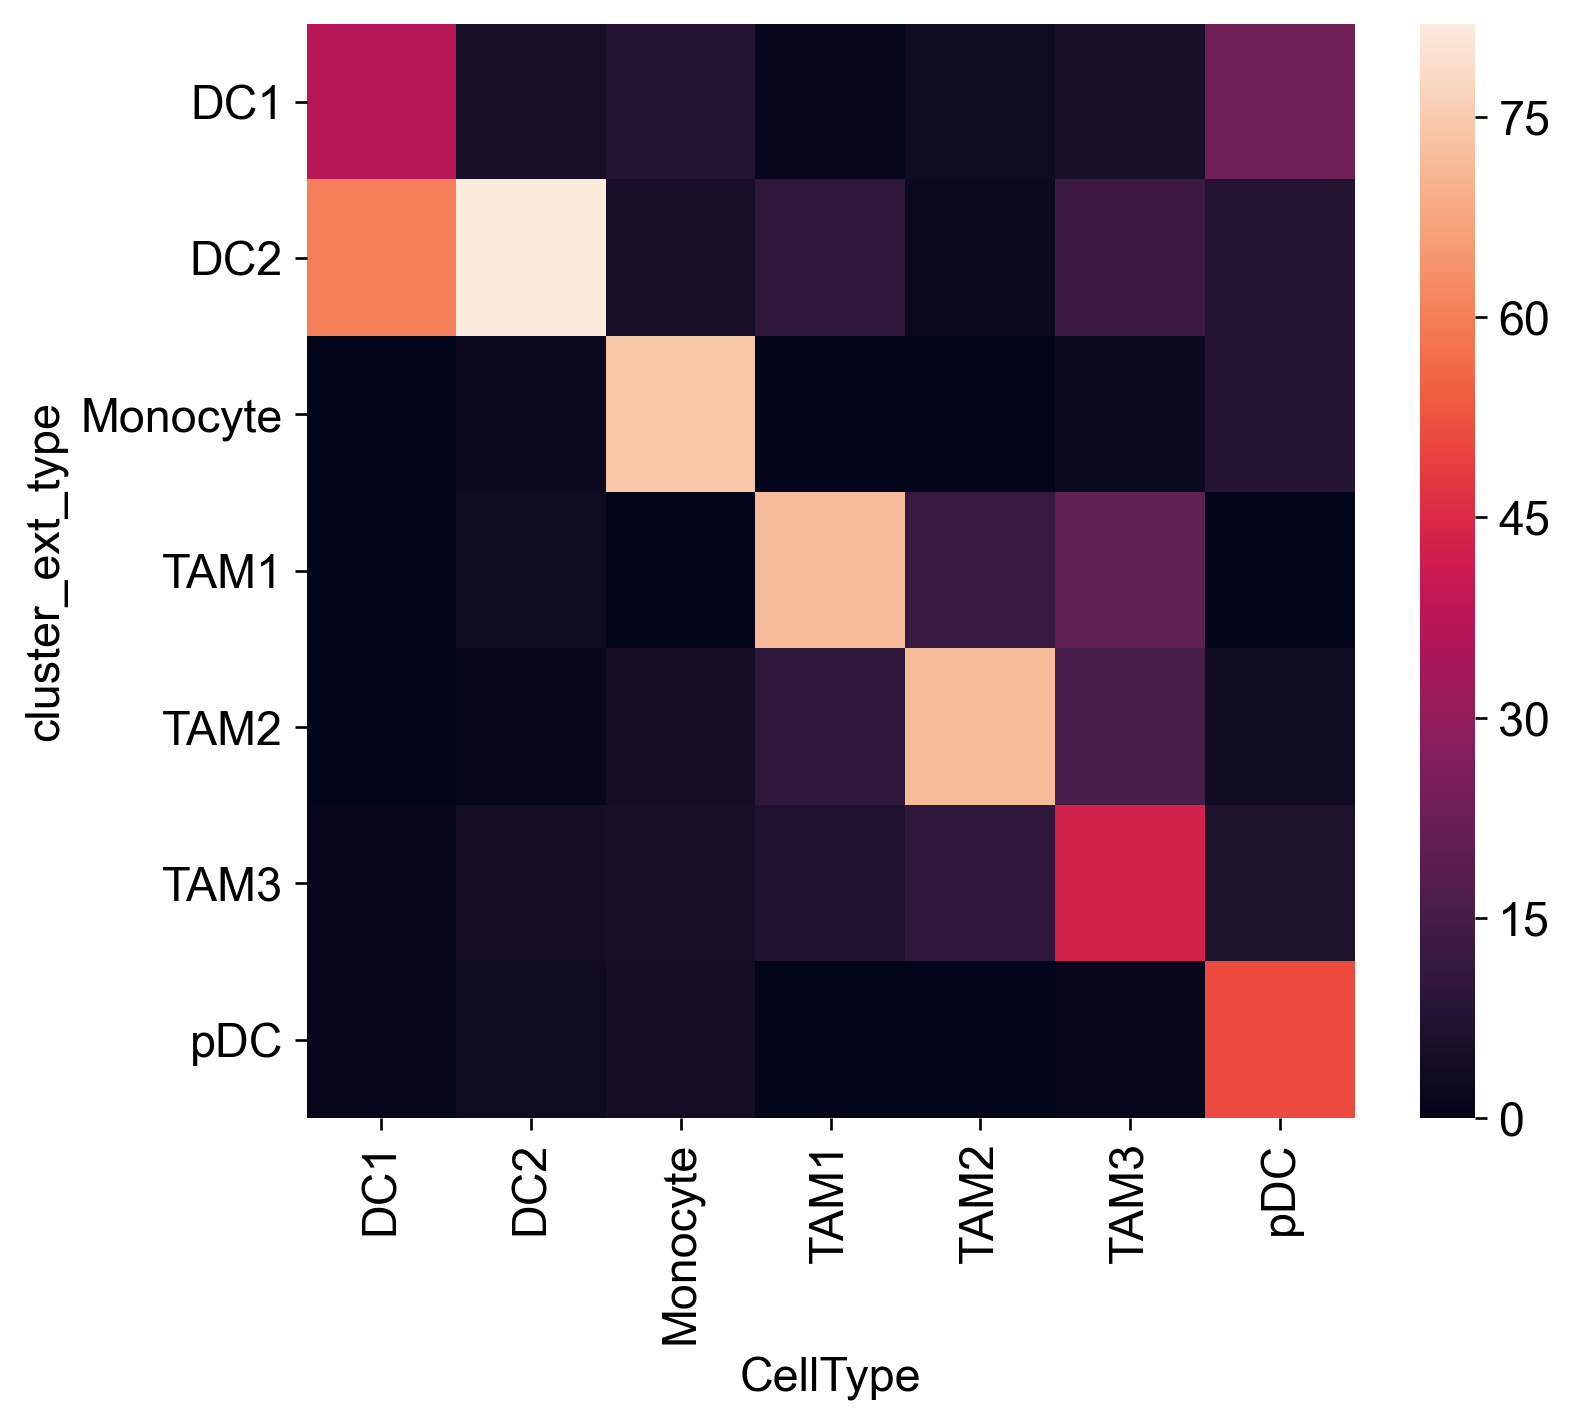

In [8]:
import pandas as pd
import numpy as np

fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
print ("Previous size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 7
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

myedf = pd.read_csv('./data/cluster_ext_type.csv',index_col=0)
display(myedf.head())
print(myedf.shape)

myedf1 = myedf.groupby(['cluster_ext_type','CellType']).size().unstack().fillna(0).round(0).astype(int)
myedf1 = myedf1.drop(['Unknown'], axis=0)
myedf1 = myedf1.apply(lambda x : x/sum(x)*100).round(0).astype(int)

sns.heatmap(myedf1)

## Test on Fetal liver+HCC integrated data

,cluster_ext_type,CellType
AAGTCTGTCATCTGCC-1,DC2,DC2
ACTTTCACAGTCTTCC-1,DC2,pDC
ACTTTCAGTCCCTACT-1,TAM1,FLM
CAACTAGCACCCTATC-1,DC2,DC2
CCTTCCCTCGCCTGTT-1,Monocyte,Monocytes


(9307, 2)
Current size: [12, 6]


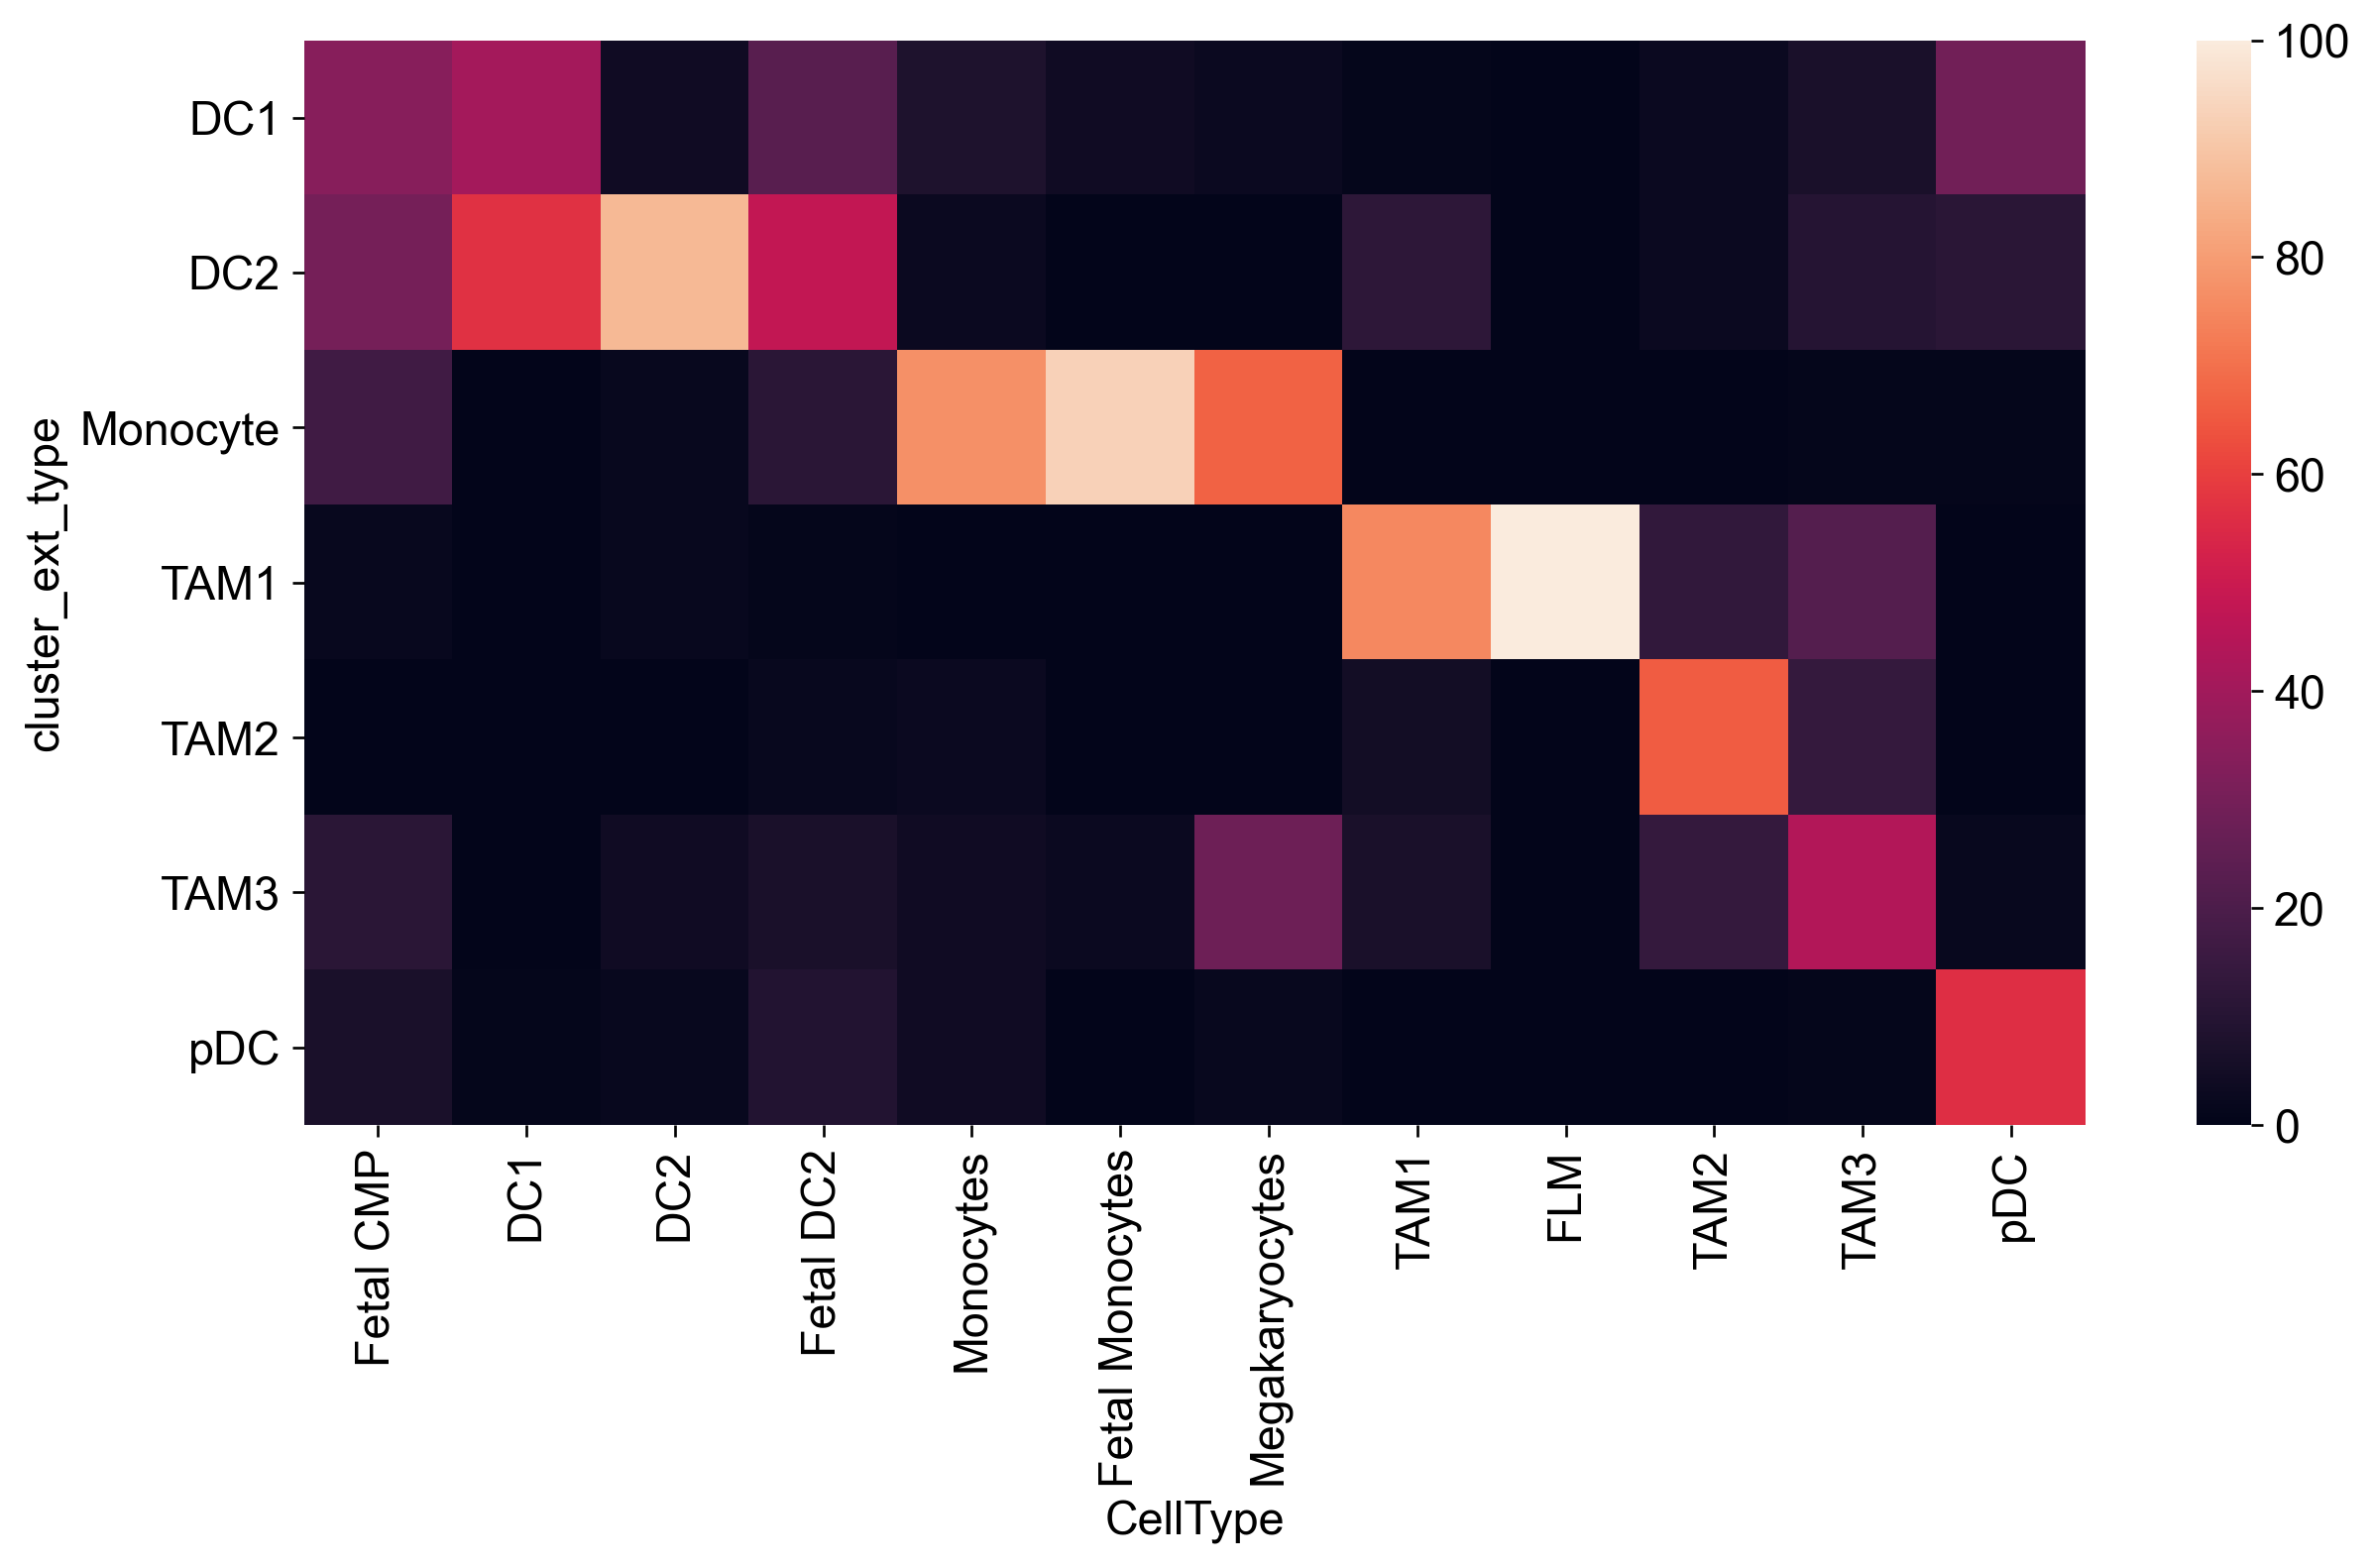

In [10]:
myedf = pd.read_csv('./data/test_cluster_ext_type.csv',index_col=0)
display(myedf.head())
print(myedf.shape)

fig_size[0] = 12
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

myedf1 = myedf.groupby(['cluster_ext_type','CellType']).size().unstack().fillna(0).round(0).astype(int)

myedf1 = myedf1.drop(['Unknown'], axis=0)
myedf1 = myedf1[['Fetal CMP','DC1','DC2','Fetal DC2','Monocytes','Fetal Monocytes','Megakaryocytes','TAM1',
                 'FLM','TAM2','TAM3','pDC']]
myedf1 = myedf1.apply(lambda x : x/sum(x)*100, axis=0).round(0).astype(int)

sns.heatmap(myedf1)

CellType,Bcells,DC Cst3,DC Siglech,Endothelial,Hepatocytes,Monocytes,TOM+ve ACE,TOM+ve LYZ2 hi,TOM-ve,Tcells
cluster_ext_type,,,,,,,,,,
DC1,3,231,61,130,3,0,500,523,9,33
DC2,1,1,0,0,0,0,0,28,0,0
Monocyte,1,5,1,179,2,1986,292,212,4,1
TAM1,8,21,7,104,3,0,26,475,2406,39
TAM2,0,0,0,20,0,0,4,36,1,3
TAM3,0,0,0,11,0,0,3,20,0,0
Unknown,15,105,72,2225,75,4,1162,2726,21,1852
pDC,1467,13,68,255,0,0,89,160,3,45


Current size: [8, 4]


CellType,Tcells,DC Cst3,DC Siglech,Monocytes,TOM+ve ACE,TOM+ve LYZ2 hi,TOM-ve,Endothelial,Hepatocytes,Bcells
cluster_ext_type,,,,,,,,,,
DC1,2,61,29,0,24,13,0,4,4,0
DC2,0,0,0,0,0,1,0,0,0,0
Monocyte,0,1,0,100,14,5,0,6,2,0
TAM1,2,6,3,0,1,11,98,4,4,1
TAM2,0,0,0,0,0,1,0,1,0,0
TAM3,0,0,0,0,0,0,0,0,0,0
pDC,2,3,33,0,4,4,0,9,0,98


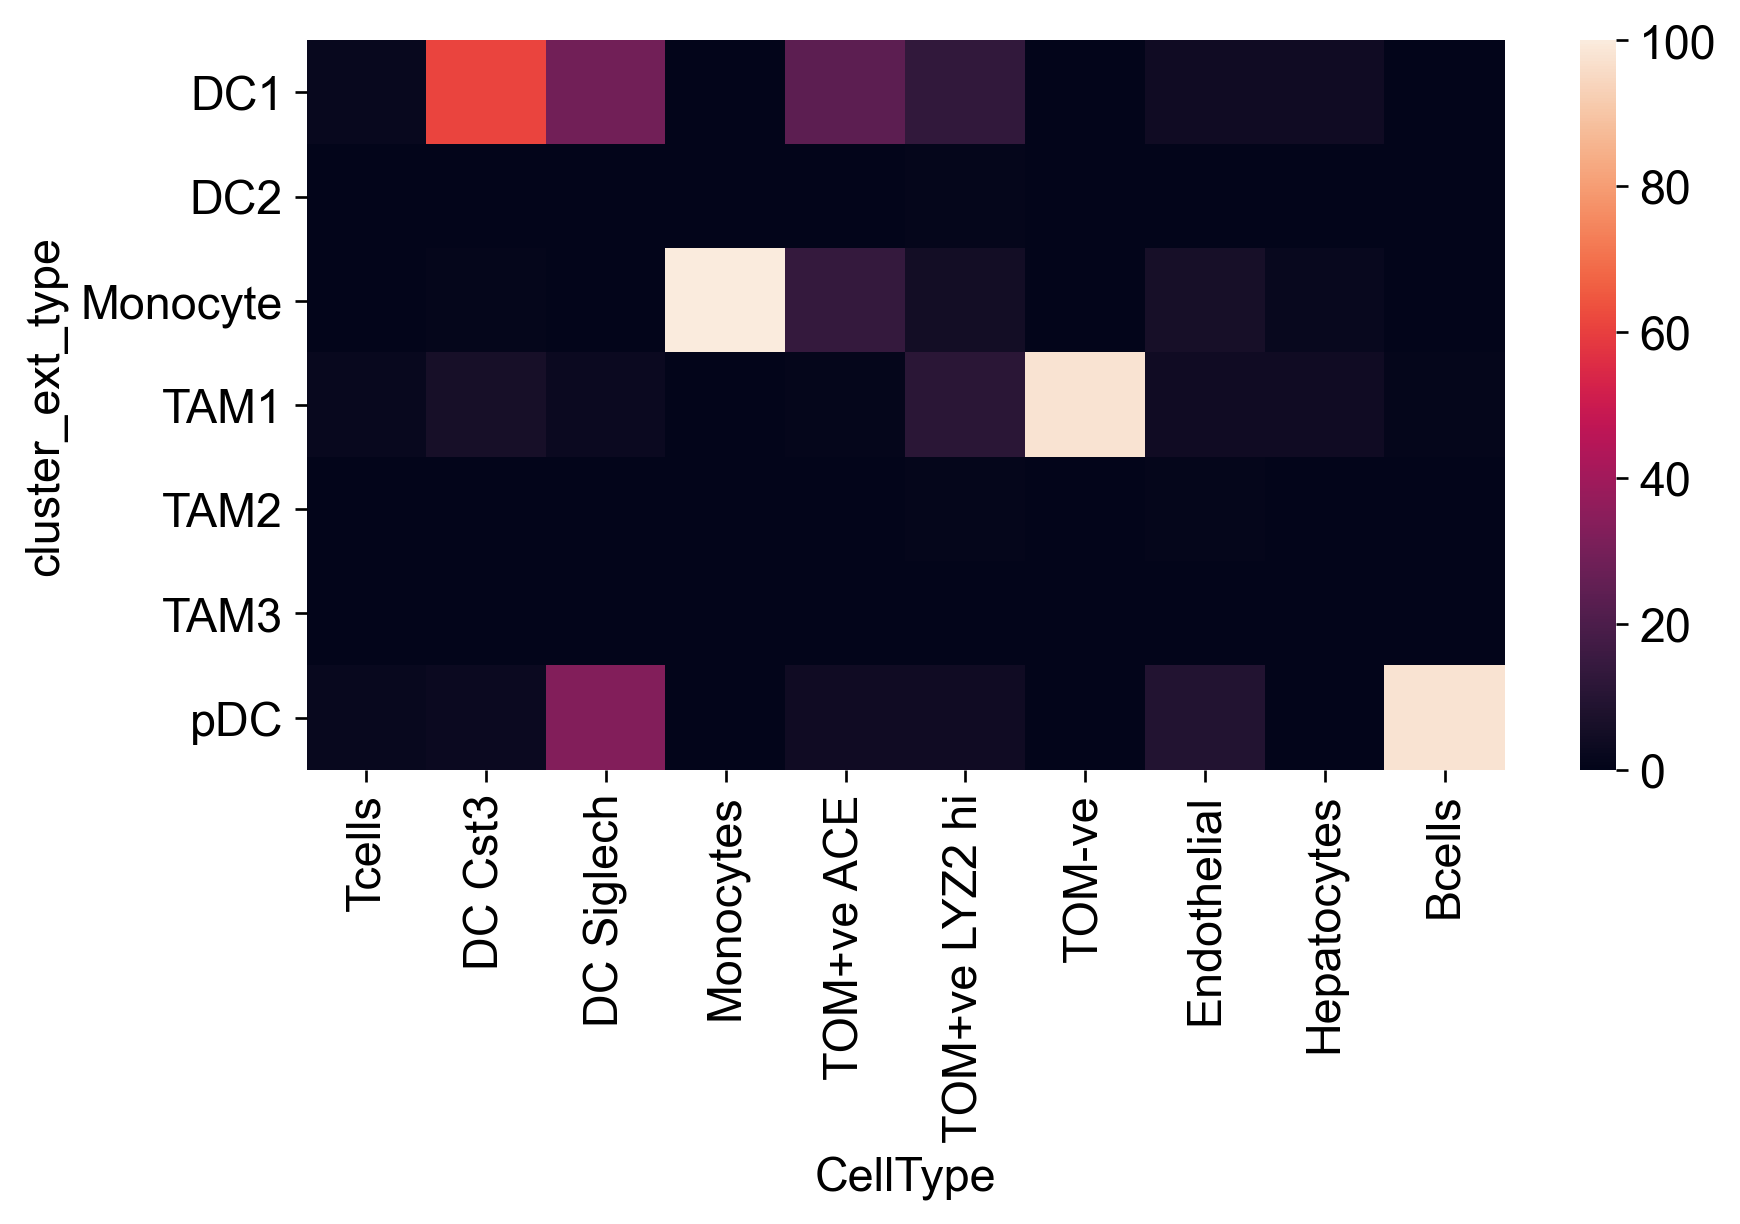

In [11]:
mousedf = pd.read_csv('./data/cluster_ext_type_mouselabelledbyhccmye.csv',index_col=0)
cat = pd.read_csv('./data/Celltype.csv',index_col=0)
mousedf['CellType'] = cat.CellType
mousedf1 = mousedf.groupby(['cluster_ext_type','CellType']).size().unstack().fillna(0).round(0).astype(int)
display(mousedf1)

fig_size[0] = 8
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

mousedf1 = mousedf.groupby(['cluster_ext_type','CellType']).size().unstack().fillna(0).round(0).astype(int)

mousedf1 = mousedf1[['Tcells','DC Cst3','DC Siglech','Monocytes', 'TOM+ve ACE', 'TOM+ve LYZ2 hi','TOM-ve',
                       'Endothelial','Hepatocytes','Bcells']]
mousedf1 = mousedf1.loc[['DC1', 'DC2', 'Monocyte', 'TAM1', 'TAM2', 'TAM3','pDC', 'Unknown'],:]
mousedf1 = mousedf1.apply(lambda x : x/sum(x)*100, axis=0).round(0).astype(int)
mousedf1 = mousedf1.drop(['Unknown'], axis=0)
display(mousedf1)

sns.heatmap(mousedf1)